In [1]:
%run util.py

In [2]:
N = 8

In [3]:
# mu_0: the initial distribution; 1 x (N**2) 
# mu: the actual stationary distribution; 1 x (N**2)
# mu_1: the estimated stationary distribution 
# P: the new transition matrix (the old transition matrix is Q)
# G_1: the estimate of the gradient
# H_1: the estimate of the Hessian
# U_1: an estimated sample path of the Gaussian random vector U; length 1000

# P is the ground truth transition matrix
mu_0, mu, mu_1, P, G_1, H_1, U_1 = ChainGen(N)  

# PP is a different transition matrix for testing purposes
mu_0P, muP, mu_1P, PP, G_1P, H_1P, U_1P = ChainGen(N) 

zdump([N, mu_0, mu, mu_1, P, G_1, H_1, U_1, mu_0P, muP, mu_1P, PP, G_1P, H_1P, U_1P], 'P_PP_%d.pkz'%N)

<string>:372: RuntimeWarning: covariance is not positive-semidefinite.


In [4]:
N, mu_0, mu, mu_1, P, G_1, H_1, U_1, mu_0P, muP, mu_1P, PP, G_1P, H_1P, U_1P = zload('P_PP_%d.pkz'%N)

In [5]:
mu

array([ 0.00699043,  0.00411895,  0.00678732,  0.03139874,  0.02828114,
        0.00061826,  0.01178882,  0.03272836,  0.02678414,  0.01551012,
        0.00218711,  0.01934473,  0.00950227,  0.00716233,  0.00367974,
        0.02842173,  0.00321769,  0.00338958,  0.00683556,  0.00692007,
        0.04550438,  0.04678903,  0.01001129,  0.00229244,  0.0035988 ,
        0.01766925,  0.01326857,  0.0323964 ,  0.00854965,  0.05806729,
        0.00360254,  0.00652954,  0.02402636,  0.00139287,  0.05347916,
        0.01386873,  0.00154609,  0.00256897,  0.03154226,  0.00135665,
        0.0021854 ,  0.05229036,  0.00898963,  0.00166357,  0.03438103,
        0.0084093 ,  0.00201562,  0.0270418 ,  0.02108852,  0.0153773 ,
        0.01454852,  0.02292035,  0.00182174,  0.00789409,  0.00352711,
        0.02076364,  0.03482068,  0.00284374,  0.01886418,  0.01516945,
        0.00019479,  0.00546743,  0.04177387,  0.00222053])

In [6]:
muP

array([ 0.01470634,  0.01068617,  0.01431443,  0.0135199 ,  0.0026232 ,
        0.01478612,  0.02843771,  0.01486965,  0.00095215,  0.00202418,
        0.03489352,  0.02160758,  0.00108779,  0.01462749,  0.00637518,
        0.022364  ,  0.00289965,  0.01156694,  0.01762468,  0.02407795,
        0.00587934,  0.02050496,  0.01893109,  0.02062336,  0.00911527,
        0.00827931,  0.00884013,  0.01302591,  0.02792886,  0.00830759,
        0.03038647,  0.00079317,  0.01557893,  0.0057478 ,  0.01692182,
        0.00361312,  0.02487501,  0.0004113 ,  0.0052701 ,  0.02799968,
        0.0123316 ,  0.02760442,  0.01257238,  0.0093392 ,  0.02456269,
        0.03460655,  0.00057059,  0.03387043,  0.00507845,  0.00120899,
        0.00705124,  0.01703762,  0.01208869,  0.04125987,  0.0167433 ,
        0.01846476,  0.05328114,  0.0368141 ,  0.00988975,  0.00445542,
        0.00137219,  0.02095397,  0.01221849,  0.03954631])

In [7]:
n = 200
beta_1 = 0.2

In [8]:
num_test_sample = 2000

In [9]:
eta_wc = {}
eta_Sanov = {}
negative_sample = {}
positive_sample = {}

# Get sample paths of the Markov chain with length n; 
# these paths will be the test set
for idx in range(int(num_test_sample/2)):
    negative_sample[idx] = chain(mu, P, n)
for idx in range(int(num_test_sample/2)):
    positive_sample[idx] = chain(muP, PP, n)
    
# Get thresholds for Hoeffding's test corresponding to sample length n    
key = str(n) + '_' + str(beta_1)
eta_1 = ThresWeakConv(N, beta_1, n, mu_0, mu, mu_1, P, G_1, H_1, U_1).ThresCal()
eta_2 = ThresSanov(N, beta_1, n, mu_0, mu, mu_1, P, G_1, H_1, U_1).ThresCal()
eta_wc[key] = eta_1
eta_Sanov[key] = eta_2

zdump([negative_sample, positive_sample, eta_wc, eta_Sanov], 'testSample_threshold_%d.pkz'%N)

In [10]:
negative_sample, positive_sample, eta_wc, eta_Sanov = zload('testSample_threshold_%d.pkz'%N)

In [11]:
len(negative_sample[0]), eta_wc, eta_Sanov

(200, {'200_0.2': 0.1629514243541629}, {'200_0.2': 0.0080471895621705})

In [12]:
from __future__ import division

mu = np.reshape(mu, (N, N))

key = str(n) + '_' + str(beta_1)

negative_sample_KL = {}
positive_sample_KL = {}

negative_sample_wc = {}
negative_sample_sv = {}

positive_sample_wc = {}
positive_sample_sv = {}

for idx in range(int(num_test_sample/2)):
    negative_sample_KL[idx] = KL_est(negative_sample[idx], mu)
    if negative_sample_KL[idx] > eta_wc[key]:
        negative_sample_wc[idx] = 1
    else:
        negative_sample_wc[idx] = -1
    if negative_sample_KL[idx] > eta_Sanov[key]:
        negative_sample_sv[idx] = 1
    else:
        negative_sample_sv[idx] = -1    
    
    
for idx in range(int(num_test_sample/2)):
    positive_sample_KL[idx] = KL_est(positive_sample[idx], mu)
    if positive_sample_KL[idx] > eta_wc[key]:
        positive_sample_wc[idx] = 1
    else:
        positive_sample_wc[idx] = -1
    if positive_sample_KL[idx] > eta_Sanov[key]:
        positive_sample_sv[idx] = 1
    else:
        positive_sample_sv[idx] = -1 

In [13]:
def count_one(x):
    s = 0
    for idx in range(len(x)):
        if x[idx] == 1:
            s += 1
    return s, len(x) - s

In [14]:
positive_sample_len_list = range(10, 1000, 10)

TPR_wc = []

for real_pos in positive_sample_len_list:
    x = [positive_sample_wc[idx] for idx in range(real_pos)]
    s, _ = count_one(x)
    TPR_wc.append(s / real_pos)
    
# TPR_wc.append(0)
# TPR_wc.append(1)

TPR_wc = list(set(TPR_wc))

TPR_wc.sort()
TPR_wc

[1.0]

In [15]:
negative_sample_len_list = range(10, 1000, 10)

FPR_wc = []

for real_neg in negative_sample_len_list:
    x = [negative_sample_wc[idx] for idx in range(real_neg)]
    s, _ = count_one(x)
    FPR_wc.append(s / real_neg)

# FPR_wc.append(0)
# FPR_wc.append(1)

FPR_wc = list(set(FPR_wc))

FPR_wc.sort()
FPR_wc

[0.1,
 0.13333333333333333,
 0.14,
 0.14444444444444443,
 0.15,
 0.15454545454545454,
 0.15833333333333333,
 0.16,
 0.16923076923076924,
 0.17142857142857143,
 0.175,
 0.17777777777777778,
 0.1793103448275862,
 0.18076923076923077,
 0.18333333333333332,
 0.184,
 0.18636363636363637,
 0.18666666666666668,
 0.1870967741935484,
 0.1875,
 0.18787878787878787,
 0.18823529411764706,
 0.19,
 0.19047619047619047,
 0.190625,
 0.19130434782608696,
 0.19166666666666668,
 0.19411764705882353,
 0.19428571428571428,
 0.19444444444444445,
 0.19473684210526315,
 0.19736842105263158,
 0.2,
 0.205,
 0.20666666666666667,
 0.20681818181818182,
 0.20833333333333334,
 0.20869565217391303,
 0.2097560975609756,
 0.21063829787234042,
 0.21132075471698114,
 0.2116279069767442,
 0.211864406779661,
 0.2125,
 0.21272727272727274,
 0.21323529411764705,
 0.2140625,
 0.21428571428571427,
 0.21475409836065573,
 0.21481481481481482,
 0.2153846153846154,
 0.21551724137931033,
 0.21578947368421053,
 0.21594202898550724,


In [16]:
range(100, 1100, 100)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

In [17]:
positive_sample_len_list = range(10, 1000, 10)

TPR_sv = []

for real_pos in positive_sample_len_list:
    x = [positive_sample_sv[idx] for idx in range(real_pos)]
    s, _ = count_one(x)
    TPR_sv.append(s / real_pos)

# TPR_sv.append(0)
# TPR_sv.append(1)

TPR_sv = list(set(TPR_sv))

TPR_sv.sort()
TPR_sv

[1.0]

In [18]:
negative_sample_len_list = range(10, 1000, 10)

FPR_sv = []

for real_neg in negative_sample_len_list:
    x = [negative_sample_sv[idx] for idx in range(real_neg)]
    s, _ = count_one(x)
    FPR_sv.append(s / real_neg)

# FPR_sv.append(0)
# FPR_sv.append(1)

FPR_sv = list(set(FPR_sv))

FPR_sv.sort()
FPR_sv

[1.0]

In [19]:
if len(TPR_sv) < len(FPR_sv):
    TPR_sv_ext = TPR_sv + [TPR_sv[-1]] * (len(FPR_sv) - len(TPR_sv))
else:
    TPR_sv_ext = TPR_sv[0:len(FPR_sv)]

In [20]:
if len(TPR_wc) < len(FPR_wc):
    TPR_wc_ext = TPR_wc + [TPR_wc[-1]] * (len(FPR_wc) - len(TPR_wc))
else:
    TPR_wc_ext = TPR_wc[0:len(FPR_wc)]

In [21]:
roc_sv_pts = [(s, t) for s, t in zip(FPR_sv, TPR_sv_ext)]

In [22]:
roc_wc_pts = [(s, t) for s, t in zip(FPR_wc, TPR_wc_ext)]

In [23]:
len(FPR_wc), len(TPR_wc_ext), len(roc_wc_pts)

(91, 91, 91)

In [24]:
roc_sv_pts, roc_wc_pts

([(1.0, 1.0)],
 [(0.1, 1.0),
  (0.13333333333333333, 1.0),
  (0.14, 1.0),
  (0.14444444444444443, 1.0),
  (0.15, 1.0),
  (0.15454545454545454, 1.0),
  (0.15833333333333333, 1.0),
  (0.16, 1.0),
  (0.16923076923076924, 1.0),
  (0.17142857142857143, 1.0),
  (0.175, 1.0),
  (0.17777777777777778, 1.0),
  (0.1793103448275862, 1.0),
  (0.18076923076923077, 1.0),
  (0.18333333333333332, 1.0),
  (0.184, 1.0),
  (0.18636363636363637, 1.0),
  (0.18666666666666668, 1.0),
  (0.1870967741935484, 1.0),
  (0.1875, 1.0),
  (0.18787878787878787, 1.0),
  (0.18823529411764706, 1.0),
  (0.19, 1.0),
  (0.19047619047619047, 1.0),
  (0.190625, 1.0),
  (0.19130434782608696, 1.0),
  (0.19166666666666668, 1.0),
  (0.19411764705882353, 1.0),
  (0.19428571428571428, 1.0),
  (0.19444444444444445, 1.0),
  (0.19473684210526315, 1.0),
  (0.19736842105263158, 1.0),
  (0.2, 1.0),
  (0.205, 1.0),
  (0.20666666666666667, 1.0),
  (0.20681818181818182, 1.0),
  (0.20833333333333334, 1.0),
  (0.20869565217391303, 1.0),
  (0.

/home/jzh/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


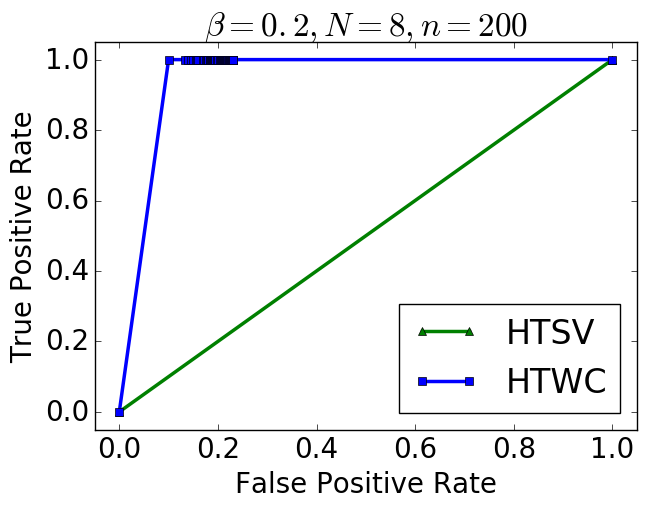

In [25]:
import matplotlib.pyplot as plt
import pylab
from pylab import *
%matplotlib inline  

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.figure(figsize=(7, 5))

matplotlib.rc('font', **font)

roc_sv, = plt.plot([0] + [roc_sv_pts[idx][0] for idx in range(len(roc_sv_pts))] + [1], \
                   [0] + [roc_sv_pts[idx][1] for idx in range(len(roc_sv_pts))] + [1], "g-^", linewidth=2.5, \
                   markersize=6)
roc_wc, = plt.plot([0] + [roc_wc_pts[idx][0] for idx in range(len(roc_wc_pts))] + [1], \
                   [0] + [roc_wc_pts[idx][1] for idx in range(len(roc_wc_pts))] + [1], "b-s", linewidth=2.5, \
                  markersize=6)

plt.legend([roc_sv, roc_wc], [r"HTSV", r"HTWC"], loc=4)
plt.title(r"$\beta = %s, N = %s, n = %s$"%(beta_1, N, n))
# plt.xticks(N_list)

pylab.xlim(-0.05, 1.05)
pylab.ylim(-0.05, 1.05)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.grid()


savefig('ROC_N_%s_n_%s.eps'%(N, n))

plt.show()